In [1]:
import sys
sys.path.append('../scripts')

import pandas as pd
from omegaconf import OmegaConf

from load import load_config, read_config_data
from preprocess import preprocess_profiles
from plot_utils import plot_unique_value_hist

### Read subset of profiles with overlapping plates

See https://github.com/jump-cellpainting/jump-cellpainting/issues/78#issuecomment-805942281

In [2]:
subset_cfg = load_config("../configs/subset/overlap_orfs.yaml")
ann_df = read_config_data(subset_cfg["overlap_orfs"])

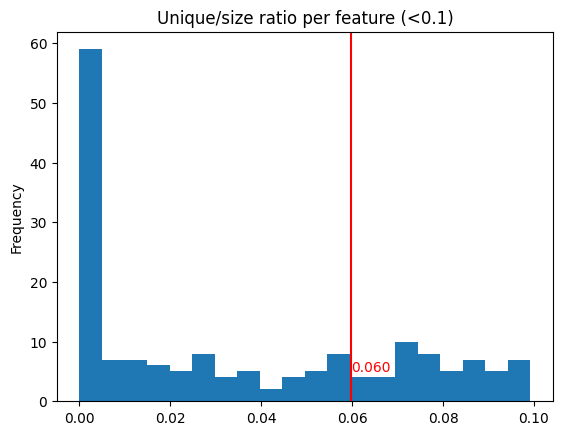

In [3]:
plot_unique_value_hist(ann_df, features="Cells_Count")

### Save subset profiles

In [4]:
ann_df.to_parquet("output/subset_profiles.parquet", index=False)

## Preprocess subset features

In [5]:
preprocess_config = load_config("../configs/preprocess")
preprocess_config = {**preprocess_config["normalize"], **preprocess_config["feature_select"]}
preprocess_config["operation"] = OmegaConf.to_object(preprocess_config["operation"])
preprocess_config

{'group': 'Metadata_Plate',
 'method': 'mad_robustize',
 'mad_robustize_epsilon': 0.0,
 'image_features': True,
 'feature_whitelist': ['Cells_Count'],
 'operation': ['variance_threshold',
  'correlation_threshold',
  'drop_na_columns',
  'blocklist'],
 'unique_cut': 0.01}

In [6]:
%%time
ann_df = preprocess_profiles(ann_df, config=preprocess_config)
ann_df.shape

CPU times: user 11min 44s, sys: 3.76 s, total: 11min 47s
Wall time: 11min 48s


(19143, 842)

#### Check that feature medians are close to 0

In [7]:
ann_df.reset_index(drop=True, inplace=True)
ann_df.groupby("Metadata_Plate").median(numeric_only=True).filter(regex="^(?!Metadata_)").max().sort_values(ascending=False)

Nuclei_Correlation_Overlap_ER_RNA                4.963505e-05
Nuclei_AreaShape_Solidity                        2.644854e-05
Cells_Texture_InfoMeas2_ER_3_00_256              2.627647e-05
Nuclei_Correlation_Overlap_AGP_ER                2.497097e-05
Nuclei_Correlation_Overlap_DNA_RNA               2.196824e-05
                                                     ...     
Image_ImageQuality_LocalFocusScore_OrigDNA_50    4.431157e-08
Nuclei_AreaShape_Orientation                     2.785243e-08
Cytoplasm_AreaShape_Orientation                  7.223931e-09
Cells_Correlation_Manders_DNA_RNA                0.000000e+00
Cells_Count                                      0.000000e+00
Length: 825, dtype: float64

### Save processed subset profiles

In [8]:
ann_df.to_parquet("output/subset_processed_profiles.parquet", index=False)

In [9]:
ann_df = pd.read_parquet("output/subset_processed_profiles.parquet")
ann_df

,Metadata_JCP2022,Metadata_broad_sample,Metadata_Name,Metadata_Vector,Metadata_Transcript,Metadata_Symbol,Metadata_NCBI_Gene_ID,Metadata_Taxon_ID,Metadata_Gene_Description,Metadata_Prot_Match,...,Nuclei_Texture_InfoMeas1_ER_3_03_256,Nuclei_Texture_InfoMeas1_Mito_3_02_256,Nuclei_Texture_InfoMeas1_RNA_3_00_256,Nuclei_Texture_InfoMeas2_AGP_3_00_256,Nuclei_Texture_InfoMeas2_ER_3_00_256,Nuclei_Texture_InfoMeas2_Mito_3_00_256,Nuclei_Texture_SumVariance_AGP_5_01_256,Nuclei_Texture_SumVariance_DNA_3_02_256,Nuclei_Texture_SumVariance_ER_10_03_256,Cells_Count
0,JCP2022_900008,ccsbBroad304_00010,ORF011294.1_TRC304.1,pLX_304,NM_001278352.1,ACO1,48,9606,aconitase 1,100.0,...,-1.630447,0.320777,-1.428334,-0.046419,1.271371,-0.208324,0.202360,-0.044861,1.367060,1.016925
1,JCP2022_900034,ccsbBroad304_00038,ORF001874.1_TRC304.1,pLX_304,NM_000643.2,AGL,178,9606,"amylo-alpha-1, 6-glucosidase, 4-alpha-glucanot...",100.0,...,-1.713351,-0.090217,-1.458614,0.120309,1.279027,0.650121,0.918840,-1.644120,0.823474,1.577271
2,JCP2022_900327,ccsbBroad304_00356,ORF005713.1_TRC304.1,pLX_304,NM_001304.5,CPD,1362,9606,carboxypeptidase D,100.0,...,-0.825970,-0.270656,-1.012781,1.297825,0.836286,0.252346,0.643505,0.677639,0.375317,-0.352811
3,JCP2022_900417,ccsbBroad304_00448,ORF010275.1_TRC304.1,pLX_304,NM_021120.4,DLG3,1741,9606,discs large MAGUK scaffold protein 3,100.0,...,0.986662,-0.681650,-0.306966,1.863373,-0.466784,2.045490,-1.688061,-2.013634,-1.290032,-0.290550
4,JCP2022_900443,ccsbBroad304_00474,ORF014835.1_TRC304.1,pLX_304,NM_001258316.1,ECT2,1894,9606,epithelial cell transforming 2,100.0,...,-0.172973,-0.744660,0.122160,1.553597,-0.090734,0.735807,0.096500,0.539514,-0.416065,-0.477332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,JCP2022_915130,ccsbBroad304_99991,ORFC00003.1_TRC304.1,pLX_304,promegaLuc.1,LUCIFERASE,LUCIFERASE,CONTROL,promegaLuc,100.0,...,-0.553293,0.229975,-0.506501,0.138817,0.536639,-0.447200,0.750188,-0.106818,0.762016,0.208088
19139,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,0.866828,1.257922,0.440656,-0.330972,-0.730616,-0.157921,-0.383947,0.371311,-0.588184,1.270052
19140,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,1.806110,0.192932,1.315214,-1.499569,-1.646347,-0.357171,-1.256609,-0.274468,-1.299471,1.076315
19141,JCP2022_915131,ccsbBroad304_99994,ORFC00004.1_TRC304.1,pLX_304,LacZ.1,LacZ,LacZ,CONTROL,Hahn Lab LacZ,100.0,...,-0.538802,-0.879772,-0.753843,0.676057,0.616393,-0.898091,-0.657668,0.375204,-0.104637,-1.191122


In [12]:
# plot_unique_value_hist(ann_df, features="Cells_Count")